In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rc('axes', linewidth=2, labelsize=22, labelpad=10)
mpl.rc('xtick', direction='in', top=True, labelsize=18)
mpl.rc('ytick', direction='in', right=True, labelsize=18)
mpl.rc('xtick.major', size=5, width=2)
mpl.rc('ytick.major', size=5, width=2)
mpl.rc('legend', fontsize=18)
mpl.rc('font', family='Serif')

In [3]:
mCut_list = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]
n_mCut = len(mCut_list)

In [4]:
dt = 0.1
tend = 10.0
ts = np.arange(0, tend+dt, dt)

In [5]:
ee_final, q_final, wc_time = np.loadtxt('data_ee_t/ee_q_t.txt', delimiter=' ').transpose()

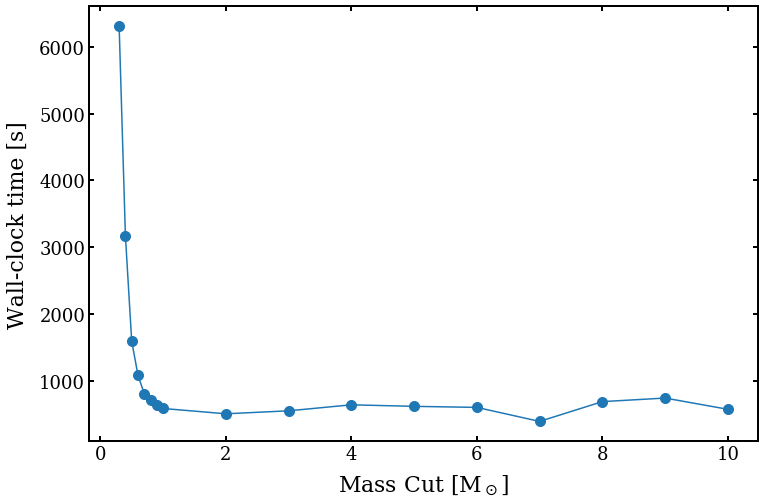

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_xlabel(r'Mass Cut [M$_\odot$]')
ax.set_ylabel('Wall-clock time [s]')
ax.plot(mCut_list, wc_time, '-o', ms=10)
fig.savefig('report_plot/mcut_time.jpg', dpi=100, bbox_inches='tight')
None

In [7]:
mCuts, n_low, n_high = np.loadtxt('n_low_high.txt', delimiter=',').transpose()

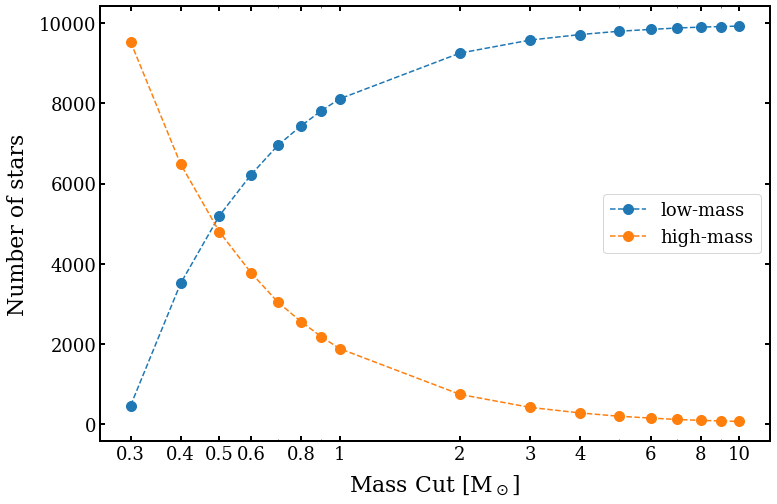

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_xlabel(r'Mass Cut [M$_\odot$]')
ax.set_ylabel('Number of stars')
ax.plot(mCuts, n_low, '--o', ms=10, label='low-mass')
ax.plot(mCuts, n_high, '--o', ms=10, label='high-mass')
ax.set_xscale('log')
ax.xaxis.set_ticks([0.3, 0.4, 0.5, 0.6, 0.8, 1, 2, 3, 4, 6, 8, 10])
ax.set_xticklabels([0.3, 0.4, 0.5, 0.6, 0.8, 1, 2, 3, 4, 6, 8, 10])
ax.legend()
fig.savefig('report_plot/number_low_high.jpg', dpi=300, bbox_inches='tight')
None

In [9]:
ee_list = np.empty(n_mCut)
fail_points = np.empty(n_mCut)
for i, mCut in enumerate(mCut_list):
    ee, q = np.loadtxt('data_ee_t/ee_q_'+str(mCut)+'.txt', delimiter=' ').transpose()
    fail_points[i] = ts[np.where(ee<=1.0)[0][-1]]
    ee_list[i] = ee[-1]

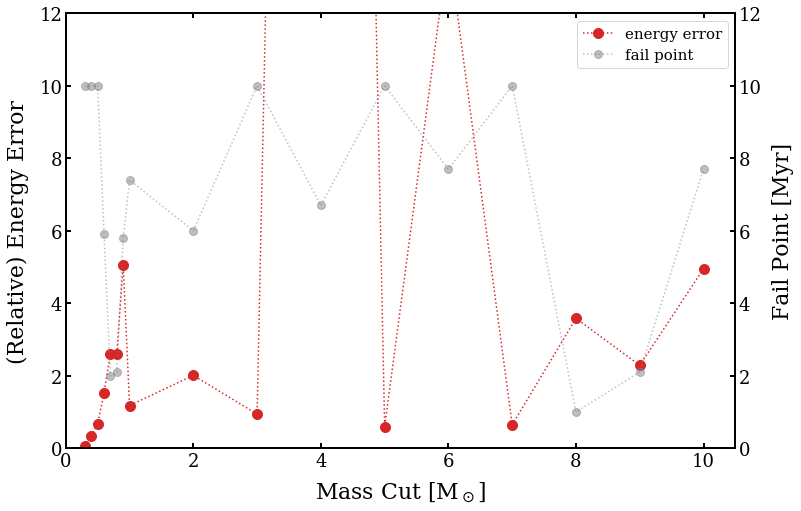

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#ax.set_xscale('log')
#ax.scatter(mCut_list, ee_list, s=30, label='energy error')
ax.plot(mCut_list, ee_list, ':o', ms=10, c='C3', label='energy error')
ax.set_xlabel(r'Mass Cut [M$_\odot$]')
ax.set_ylabel('(Relative) Energy Error')
ax.set_xlim(0, 10.5)
ax.set_ylim(0, 12)
ax2 = ax.twinx()
ax2.set_ylim(0, 12)
ax2.set_ylabel('Fail Point [Myr]')
ax.plot(mCut_list, fail_points, ':o', ms=8, c='grey', alpha=0.5, label='fail point')
ax.legend(fontsize=15)
fig.savefig('report_plot/mcut_ee_fp.jpg', dpi=300, bbox_inches='tight')
None

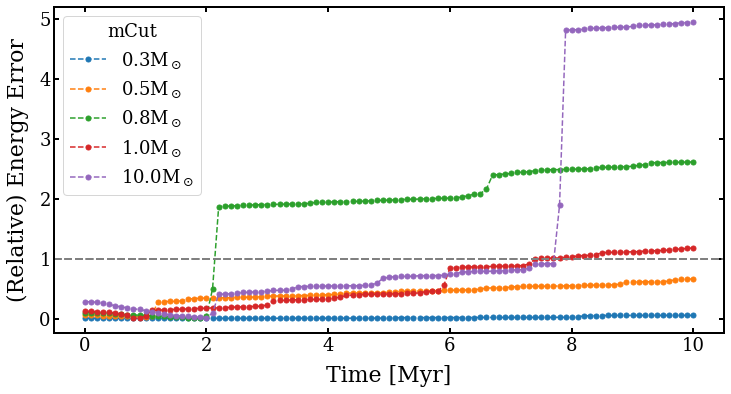

In [12]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
for mCut in [0.3, 0.5, 0.8, 1.0, 10.0]:
    ee, _ = np.loadtxt('data_ee_t/ee_q_'+str(mCut)+'.txt', delimiter=' ').transpose()
    ax.plot(ts, ee, '--o', ms=5, label=r'%.1fM$_\odot$'%mCut)
    ax.set_xlabel('Time [Myr]')
    ax.set_ylabel('(Relative) Energy Error')
    ax.axhline(y=1.0, lw=2, ls='--', c='grey')
    lg = ax.legend(title='mCut')
    lg.get_title().set_fontsize(18)
fig.savefig('report_plot/ee_t.jpg', dpi=300, bbox_inches='tight')
None

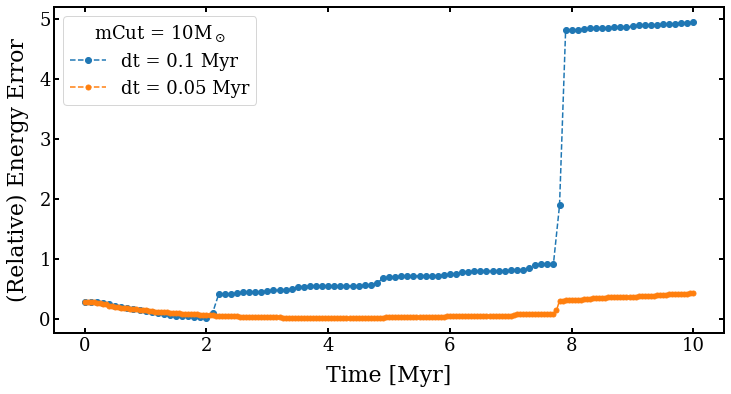

In [63]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
small_dt = 0.05
small_ts = np.arange(0, tend+small_dt, small_dt)
ee_10_normal_ts, _ = np.loadtxt('data_ee_t/ee_q_10.0.txt', delimiter=' ').transpose()
ee_10_small_ts, _ = np.loadtxt('data_ee_t/ee_q_10.0_ts0.05.txt', delimiter=' ').transpose()
ax.plot(ts, ee_10_normal_ts, '--o', label='dt = 0.1 Myr')
ax.plot(small_ts, ee_10_small_ts, '--o', ms=5, label='dt = 0.05 Myr')
ax.set_xlabel('Time [Myr]')
ax.set_ylabel('(Relative) Energy Error')
lg = ax.legend(title=r'mCut = 10M$_\odot$')
lg.get_title().set_fontsize(18)
fig.savefig('report_plot/ee_t_dt.jpg', dpi=300, bbox_inches='tight')
None

In [121]:
weight = wall_time*ee_final
mCut_best = mCut_list[np.where(weight == np.min(weight))[0][0]]